# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 12</center>

# <center>KMean Clustering</center>

![image-14.png](attachment:image-14.png)

# <font color="blue">Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Train test Split </li>
<li> Train Linear Model</li>
<li> Train Non Linear Model</li>
<li> Train Complex Model </li>
<li> Train Regularized Model</li>
</ol>

## <font color = blue>0. Learning Objectives

Use Kmean algorithm to implement unsupervised clustering for iris dataset.

By the end of the lab, you should be able to :
- Differentiate supervised and unsupervised learning.


- Implement Kmean clustering any given dataset.





## <font color = blue>1. Loading Data

    - Lets load iris dataset for clustering. Note that you don't have to include target for unsupervised learning.
    

In [4]:
#import libraries first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
#Load datasets
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
df = pd.DataFrame(iris.data, columns= iris.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [8]:
idf = df.drop(['sepal length (cm)','sepal width (cm)'],axis=1)
idf.head()

petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2

## <font color = blue> 2. Data Manipulation and visualization

<AxesSubplot:>

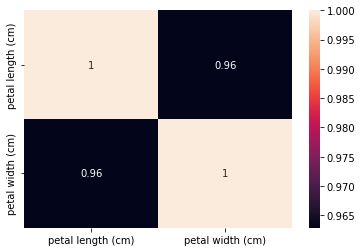

In [10]:
#visualize your data here
data = idf.corr()
sns.heatmap(data, annot = True)

C:\Users\LAB1\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

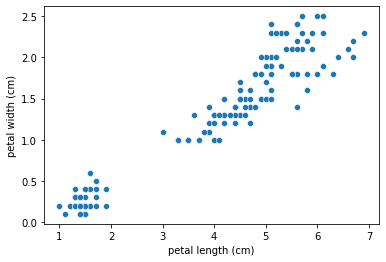

In [12]:
x = idf['petal length (cm)']
y = idf['petal width (cm)']
sns.scatterplot(x,y)


In [13]:
idf.isna().sum()

petal length (cm)    0
petal width (cm)     0
dtype: int64

## <font color = blue> 3. Train model

In [39]:
#train your model here
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(idf)

KMeans(n_clusters=3, random_state=0)

## <font color = blue> 4. Explore KMeans attributes

In [40]:
#check Kmean algorithm's attribute
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [41]:
kmeans.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [42]:
kmeans.inertia_

31.371358974358973

In [43]:
kmeans.n_iter_

6

In [44]:
kmeans.n_features_in_

2

In [45]:
kmeans.feature_names_in_

array(['petal length (cm)', 'petal width (cm)'], dtype=object)

## <font color = blue> 5. Prediction

In [46]:
#create sample data to make prediction. Interpret your output for unsupervised clustering
x_sample = [[5.6, 0.4]]

In [60]:
y_pred = kmeans.predict(x_sample)
y_pred

C:\Users\LAB1\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2])

## <font color = blue> 6. Plotting clusters with thier centroids

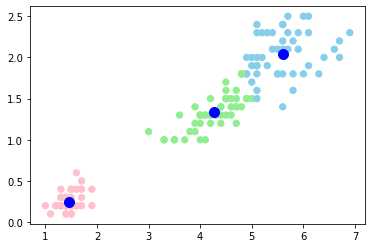

In [55]:
# Plot your datapoints and show the clusters in different colors along with thier cluster centroids.
colormap = np.array(['pink','skyblue', 'lightgreen'])
x = df[['petal length (cm)', 'petal width (cm)']]
category = kmeans.predict(x)
plt.scatter(x['petal length (cm)'],x['petal width (cm)'], s= 40, c = colormap[category])
plt.scatter(1.462, 0.246,s = 100, c='b')
plt.scatter(5.59583333, 2.0375,s = 100, c='b')
plt.scatter(4.26923077, 1.34230769,s = 100, c='b')
plt.show()

## <font color = blue> 7. Use elbow method to choose K for Kmean

In [65]:
# plot grah to decide K value for given dataset.
distortions = []
for i in range(1,4):
    kmeanModel = KMeans(n_clusters=i)
    kmeanModel.fit(idf)
    distortions.append(kmeanModel.inertia_)


C:\Users\LAB1\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [68]:
plt.figure(figsize=(16,8))
plt.plot(range(1,4, distortions)
plt.xlabel('i')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

SyntaxError: invalid syntax (3619473283.py, line 3)